In [2]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
%matplotlib inline

In [ ]:
seed = 42

## Common issues
- Usage of KMeans, linear regression, Naive Bayes, SVD
- Wrong data transformation methods like dummies

In [3]:
from sklearn.datasets import load_iris
df = load_iris(as_frame=True)['frame']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2, random_state=7)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape

((120, 4), (120,))

In [5]:
km = KMeans(n_clusters=3, random_state=seed)
km.fit(x_train, y_train)
# print(classification_report(y_test, km.predict(x_test)))
silhouette_score(x_test, labels=y_test)

0.29236931439208014

Silhouette Score: 0.292
Explained Variance ratio: 0.961


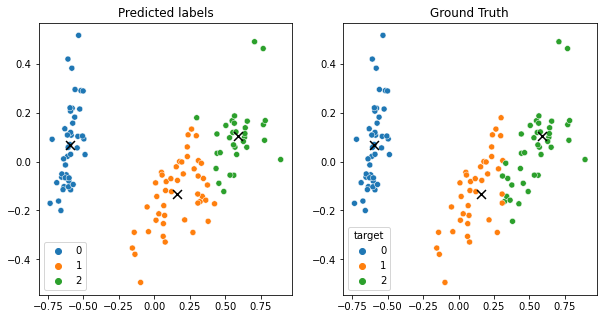

In [6]:
def fit_reduce_plot(data, target, plot='train'):
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=7)
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    km = KMeans(n_clusters=3, random_state=seed)
    km.fit(x_train, y_train)
    
    reducer = PCA(n_components=2, random_state=seed)
    reducer.fit(x_train)
    reduced_train = reducer.transform(x_train)
    reduced_test = reducer.transform(x_test)
    centroids = km.cluster_centers_
    reduced_centroids = reducer.transform(centroids)
    color_map = {idx: color for idx, color in enumerate(sns.color_palette())}

    print(f'Silhouette Score: {silhouette_score(x_test, labels=y_test):.3f}')
    print(f'Explained Variance ratio: {sum(reducer.explained_variance_ratio_):.3f}')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    if plot == 'train':
        sns.scatterplot(x=reduced_train[:, 0], y=reduced_train[:, 1], hue=km.predict(x_train), palette=color_map, ax=axes[0])
        axes[0].scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
        # plt.show()
        sns.scatterplot(x=reduced_train[:, 0], y=reduced_train[:, 1], hue=y_train, palette=color_map, ax=axes[1])
        axes[1].scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
        axes[0].title.set_text('Predicted labels')
        axes[1].title.set_text('Ground Truth')
    elif plot == 'test':
        sns.scatterplot(x=reduced_test[:, 0], y=reduced_test[:, 1], hue=km.predict(x_test), palette=color_map, ax=axes[0])
        axes[0].scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
        sns.scatterplot(x=reduced_test[:, 0], y=reduced_test[:, 1], hue=y_test, palette=color_map, ax=axes[1])
        axes[1].scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
    axes[0].title.set_text('Predicted labels')
    axes[1].title.set_text('Ground Truth')

fit_reduce_plot(df.drop('target', axis=1), df.target, plot='train')


Silhouette Score: 0.292


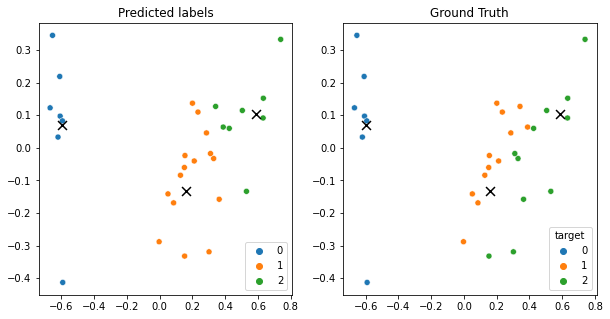

In [132]:
fit_reduce_plot(df.drop('target', axis=1), df.target, plot='test')

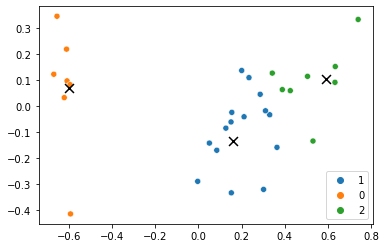

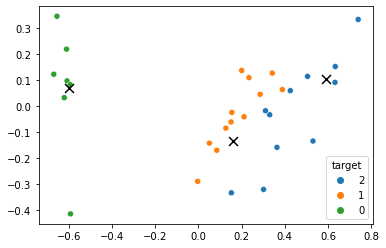

In [49]:
reducer = PCA(n_components=2)
reducer.fit(x_train)
reduced = reducer.transform(x_test)
centroids = km.cluster_centers_
reduced_centroids = reducer.transform(centroids)

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=km.predict(x_test).astype(str))
plt.scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)
plt.show()
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=y_test.astype(str))
plt.scatter(x=reduced_centroids[:, 0], y=reduced_centroids[:, 1], marker='x', color='black', s=80)

# Ordinal values with K-Means

In [127]:
df_categorical = df.copy()
df_categorical['colour'] = df.target
df_categorical

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,colour
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [77]:
x_train, x_test, y_train, y_test = train_test_split(df_categorical.drop('target', axis=1), df_categorical.target, test_size=0.2, random_state=7)

km = KMeans(n_clusters=3, random_state=seed)
km.fit(x_train, y_train)
# print(classification_report(y_test, km.predict(x_test)))
silhouette_score(x_test, labels=y_test)

0.4844947630856452

Silhouette Score: 0.555


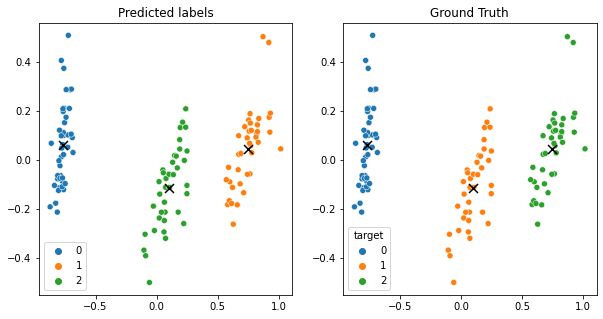

In [133]:
fit_reduce_plot(df_categorical.drop('target', axis=1), df_categorical.target, plot='train')

## Categorical values withh K-means

In [134]:
df_categorical = pd.concat([df, pd.get_dummies(df.target)], axis=1)
df_categorical

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,0,1,2
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1


Silhouette Score: 0.793


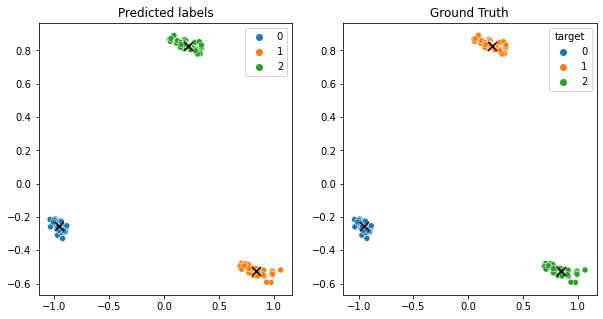

In [135]:
fit_reduce_plot(df_categorical.drop('target', axis=1), df_categorical.target, plot='train')

In [79]:
x_train, x_test, y_train, y_test = train_test_split(df_categorical.drop('target', axis=1), df_categorical.target, test_size=0.2, random_state=7)
x_train.shape, y_train.shape

((120, 7), (120,))

In [80]:
km = KMeans(n_clusters=3, random_state=seed)
km.fit(x_train, y_train)
silhouette_score(x_test, labels=y_test)

0.5518947994504149

In [56]:
wholesale = pd.read_csv('data/wholesale_customers_data.csv')
wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [57]:
wholesale.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

# Caveats with Feature Importance

In [51]:
seed = 42

In [52]:
df_raw = pd.read_csv('data/employee-attrition.csv')
df_raw.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [53]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'Gender', 'MaritalStatus', 'Over18', 'OverTime', 
'Attrition'
]

df = df_raw.copy()
for col in categorical_columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
    # df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
# df = df.drop(categorical_columns, axis=1)
# df['Attrition'] = df.Attrition.astype('category')
# df.Attrition = df.Attrition.cat.codes

RF train accuracy: 0.973
RF test accuracy: 0.830


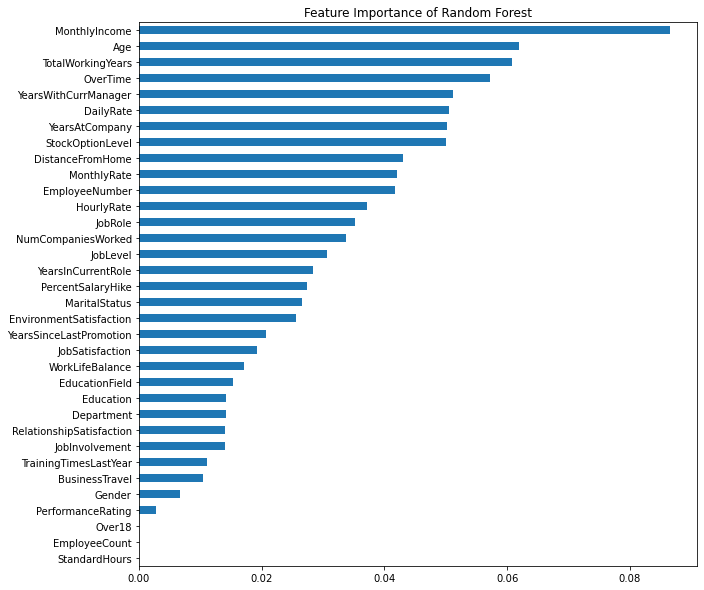

In [54]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Attrition', axis=1), 
    df.Attrition, test_size=0.2, 
    stratify=df.Attrition,
    random_state=seed
)
clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=5, class_weight='balanced', random_state=seed)
clf.fit(x_train, y_train)
print(f"RF train accuracy: {clf.score(x_train, y_train):0.3f}")
print(f"RF test accuracy: {clf.score(x_test, y_test):0.3f}")

feature_importance = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=True)
ax = feature_importance.plot.barh(figsize=(10, 10))
plt.title('Feature Importance of Random Forest')
plt.savefig('images/feature_importance1.png')

The random forest gives a strangely high importance to a random variable

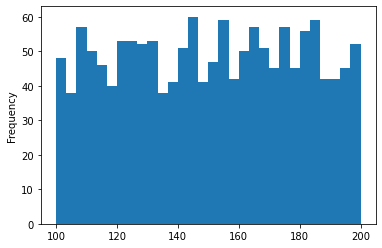

In [63]:
random.seed(seed)
df['continuous_random'] = [random.uniform(100,200) for _ in range(len(df))]
df['continuous_random'].plot.hist(bins=30)
plt.savefig('images/random_continuous_variable.png')

RF train accuracy: 0.977
RF test accuracy: 0.827


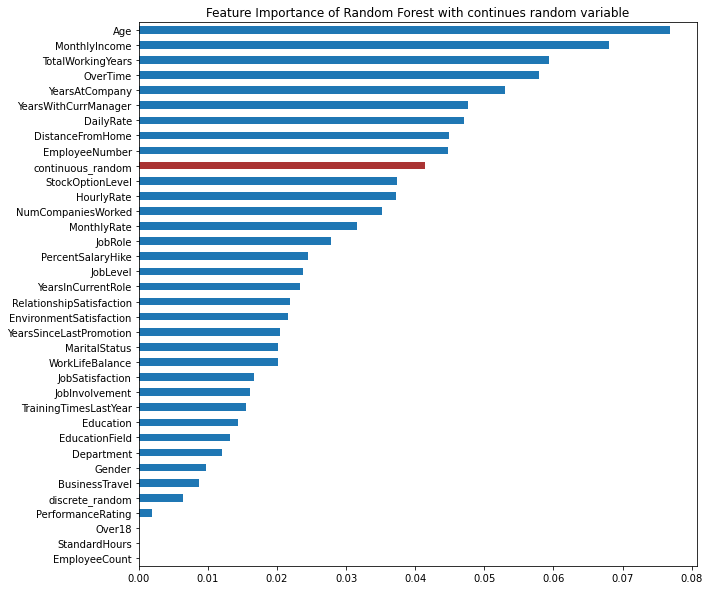

In [64]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Attrition', axis=1), 
    df.Attrition, 
    test_size=0.2, 
    stratify=df.Attrition,
    random_state=seed
)
clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=5, class_weight='balanced', random_state=seed)
clf.fit(x_train, y_train)

print(f"RF train accuracy: {clf.score(x_train, y_train):0.3f}")
print(f"RF test accuracy: {clf.score(x_test, y_test):0.3f}")

feature_importance = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=True)
ax = feature_importance.plot.barh(figsize=(10, 10))

highlight = 'continuous_random'

pos = feature_importance.index.get_loc(highlight)
ax.patches[pos].set_facecolor('#aa3333')

plt.title('Feature Importance of Random Forest with continues random variable')
plt.savefig('images/feature_importance2.png')

The random forest assign very different importances to the two variables, although they are both random and hold no information about the target variable. 

In [80]:
df['discrete_random'] = [random.randrange(100, 200, 50) for _ in range(len(df))]

RF train accuracy: 0.977
RF test accuracy: 0.820


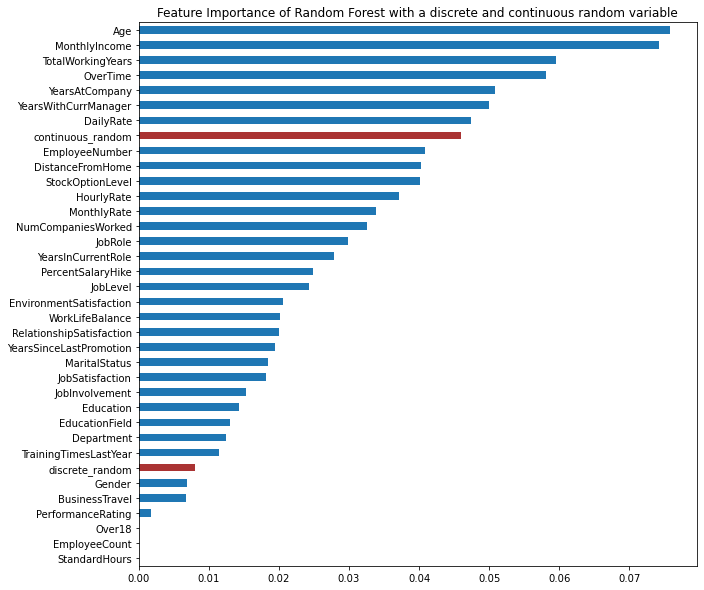

In [81]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Attrition', axis=1), 
    df.Attrition, 
    test_size=0.2, 
    stratify=df.Attrition, 
    random_state=seed
)

clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=5, class_weight='balanced', random_state=seed)
clf.fit(x_train, y_train)

print(f"RF train accuracy: {clf.score(x_train, y_train):0.3f}")
print(f"RF test accuracy: {clf.score(x_test, y_test):0.3f}")

feature_importance = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=True)
ax = feature_importance.plot.barh(figsize=(10, 10))

pos = feature_importance.index.get_loc('continuous_random')
ax.patches[pos].set_facecolor('#aa3333')
pos = feature_importance.index.get_loc('discrete_random')
ax.patches[pos].set_facecolor('#aa3333')

plt.title('Feature Importance of Random Forest with a discrete and continuous random variable')
plt.savefig('images/feature_importance3.png')

This is caused by the metric used to calculate feature importance in the random forest: impurity. Without going into details, its the metric that determines how to split in a decision tree and a random forest. 

There are two problems with this metric. From sklearn: 
1. Impurity-based importances are biased towards high cardinality features;
2. Impurity-based importances are computed on training set statistics and therefore do not reflect the ability of feature to be useful to make predictions that generalize to the test set (when the model has enough capacity).

Using the permutation importance, we can see the large differences in feature importance between the train and the test set. This is not possible with the `feature_importance`

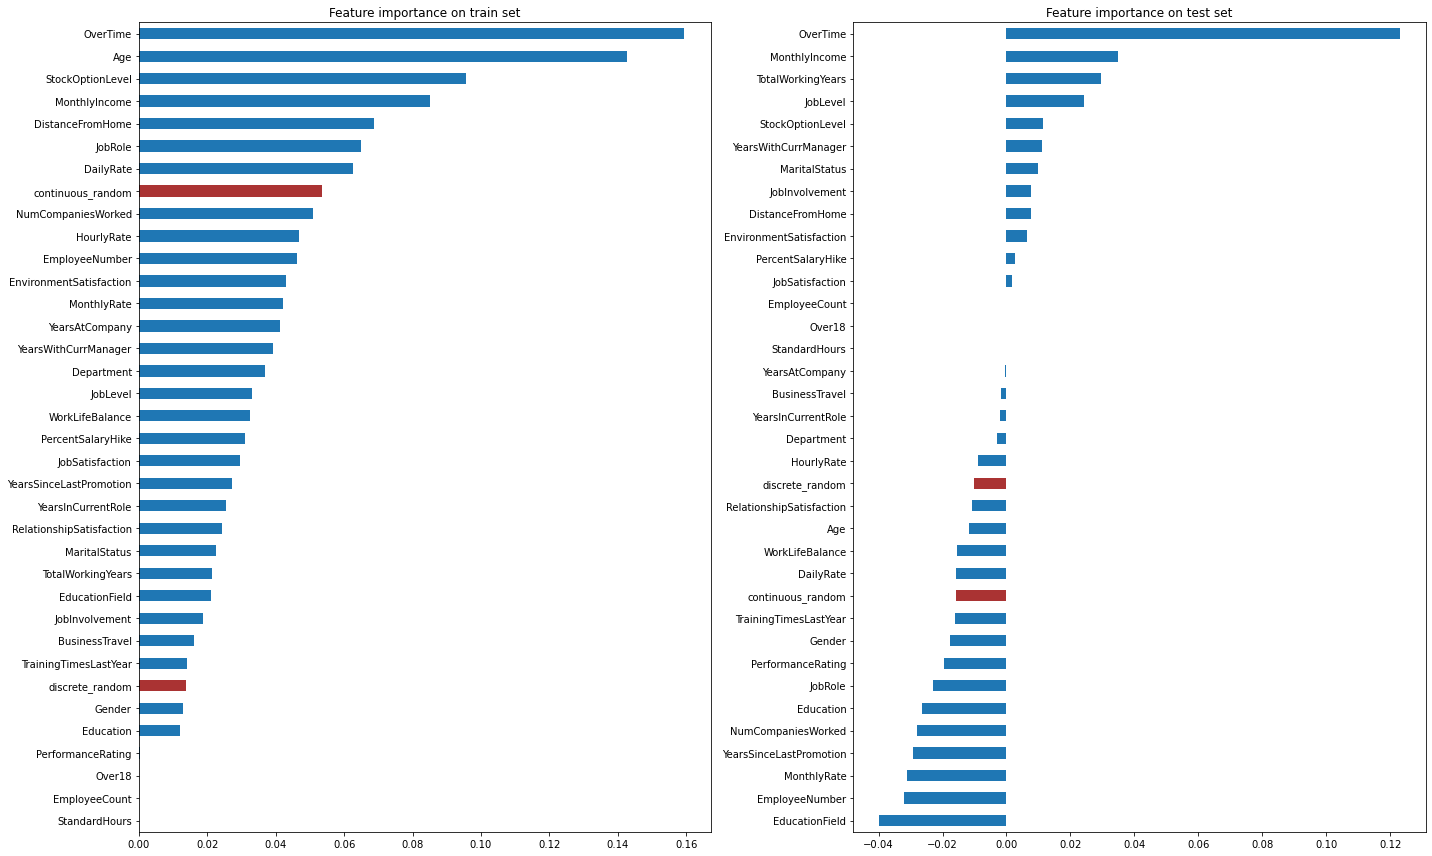

In [84]:
from sklearn.inspection import permutation_importance

# Calculate and plot feature importance test set

r = permutation_importance(clf, x_test, y_test,
                           n_repeats=10,
                           random_state=seed, 
                           n_jobs=-1,
                           scoring='f1'
                           )
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=x_test.columns)
perm['AVG_Importance'] = r.importances_mean
perm['STD_Importance'] = r.importances_std
perm = perm.sort_values('AVG_Importance')

sorted_idx = r.importances_mean.argsort()
fig, axes = plt.subplots(ncols=2, figsize=(20, 12))
# ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx])

perm.AVG_Importance.plot.barh(ax=axes[1])

pos = perm.index.get_loc('continuous_random')
axes[1].patches[pos].set_facecolor('#aa3333')
pos = perm.index.get_loc('discrete_random')
axes[1].patches[pos].set_facecolor('#aa3333')
axes[1].title.set_text('Feature importance on test set')

# Calculate and plot feature importance training set

r = permutation_importance(clf, x_train, y_train,
                           n_repeats=10,
                           random_state=seed,
                           n_jobs=-1,
                           scoring='f1'
                           )
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=x_train.columns)
perm['AVG_Importance'] = r.importances_mean
perm['STD_Importance'] = r.importances_std
perm = perm.sort_values('AVG_Importance')

sorted_idx = r.importances_mean.argsort()

perm.AVG_Importance.plot.barh(ax=axes[0])

pos = perm.index.get_loc('continuous_random')
axes[0].patches[pos].set_facecolor('#aa3333')
pos = perm.index.get_loc('discrete_random')
axes[0].patches[pos].set_facecolor('#aa3333')
axes[0].title.set_text('Feature importance on train set')
fig.tight_layout()

plt.savefig('images/feature_importance4.png')

<AxesSubplot:>

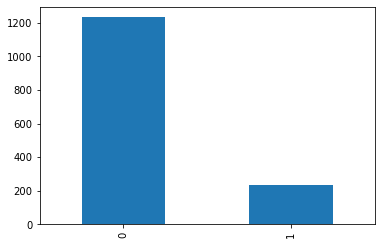

In [73]:
df.Attrition.value_counts().plot(kind='bar')